In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

$$
    C(\hat g_{in}) = ||g_{out} - \hat g_{in}||^2 + \alpha TV(\hat g_{in})
$$

In [2]:
def cost_function(g_out, g, alpha):
    norm = (np.linalg.norm(g_out - g, 'fro'))**2    
    gy, gx = np.gradient(g)
    total_variation = np.sum(np.sqrt(gx**2 + gy**2))
    return norm + alpha * total_variation

$$
    \nabla_{\hat g_{in}}C(\hat g_{in}) = -2(g_{out} - \hat g_{in}) - \alpha \nabla \cdot \left[ \frac{\nabla \hat g_{in}}{\sqrt{|\nabla \hat g_{in}|^2 + \epsilon^2}} \right]
$$

In [3]:
def cost_functional_gradient(g_out, g, alpha, epsilon):
    gy, gx = np.gradient(g)
    temp = np.sqrt(gx**2 + gy**2 + epsilon**2)
    TV_grad = -alpha*(np.gradient(gx/temp)[1] + np.gradient(gy/temp)[0])
    return 2*(g - g_out) + TV_grad

$$
    \hat g_{in}^{(k+1)} = \hat g_{in}^{(k)} - \tau \left[ \nabla_{g_{in}}C(\hat g_{in}) \right]_{\hat g = \hat g(n)}
$$

In [56]:
def TV_denoising(g_out, alpha, initial_guess, initial_step=1, epsilon = 1e-6, next_step = lambda x: 0.5*x, threshold = 5e-7):
    g = initial_guess
    tau = initial_step
    n = 0
    while True:
        func_grad = cost_functional_gradient(g_out, g, alpha, epsilon)
        if ((tau*np.linalg.norm(func_grad, 'fro')) < (threshold*np.linalg.norm(g, 'fro'))):
            break
        else:
            g_try = g - tau*func_grad
            Cost_g = cost_function(g_out, g, alpha)
            Cost_try = cost_function(g_out, g_try, alpha)
            if (Cost_try < Cost_g):
                g = g_try
            else:
                tau = next_step(tau)
        n+=1
    print(n, "iterations")
    return np.abs(g)

In [65]:
input = './Assignment 2/2.jpeg'
img = Image.open(input)
img = img.convert('L')
img = img.resize((200,200))
img_arr = np.asarray(img)

In [66]:
img_denoised = TV_denoising(img_arr, 25, np.random.randint(0, 255, img_arr.shape))

247 iterations


Text(0.5, 1.0, 'Deblurred and Reconstructed Image')

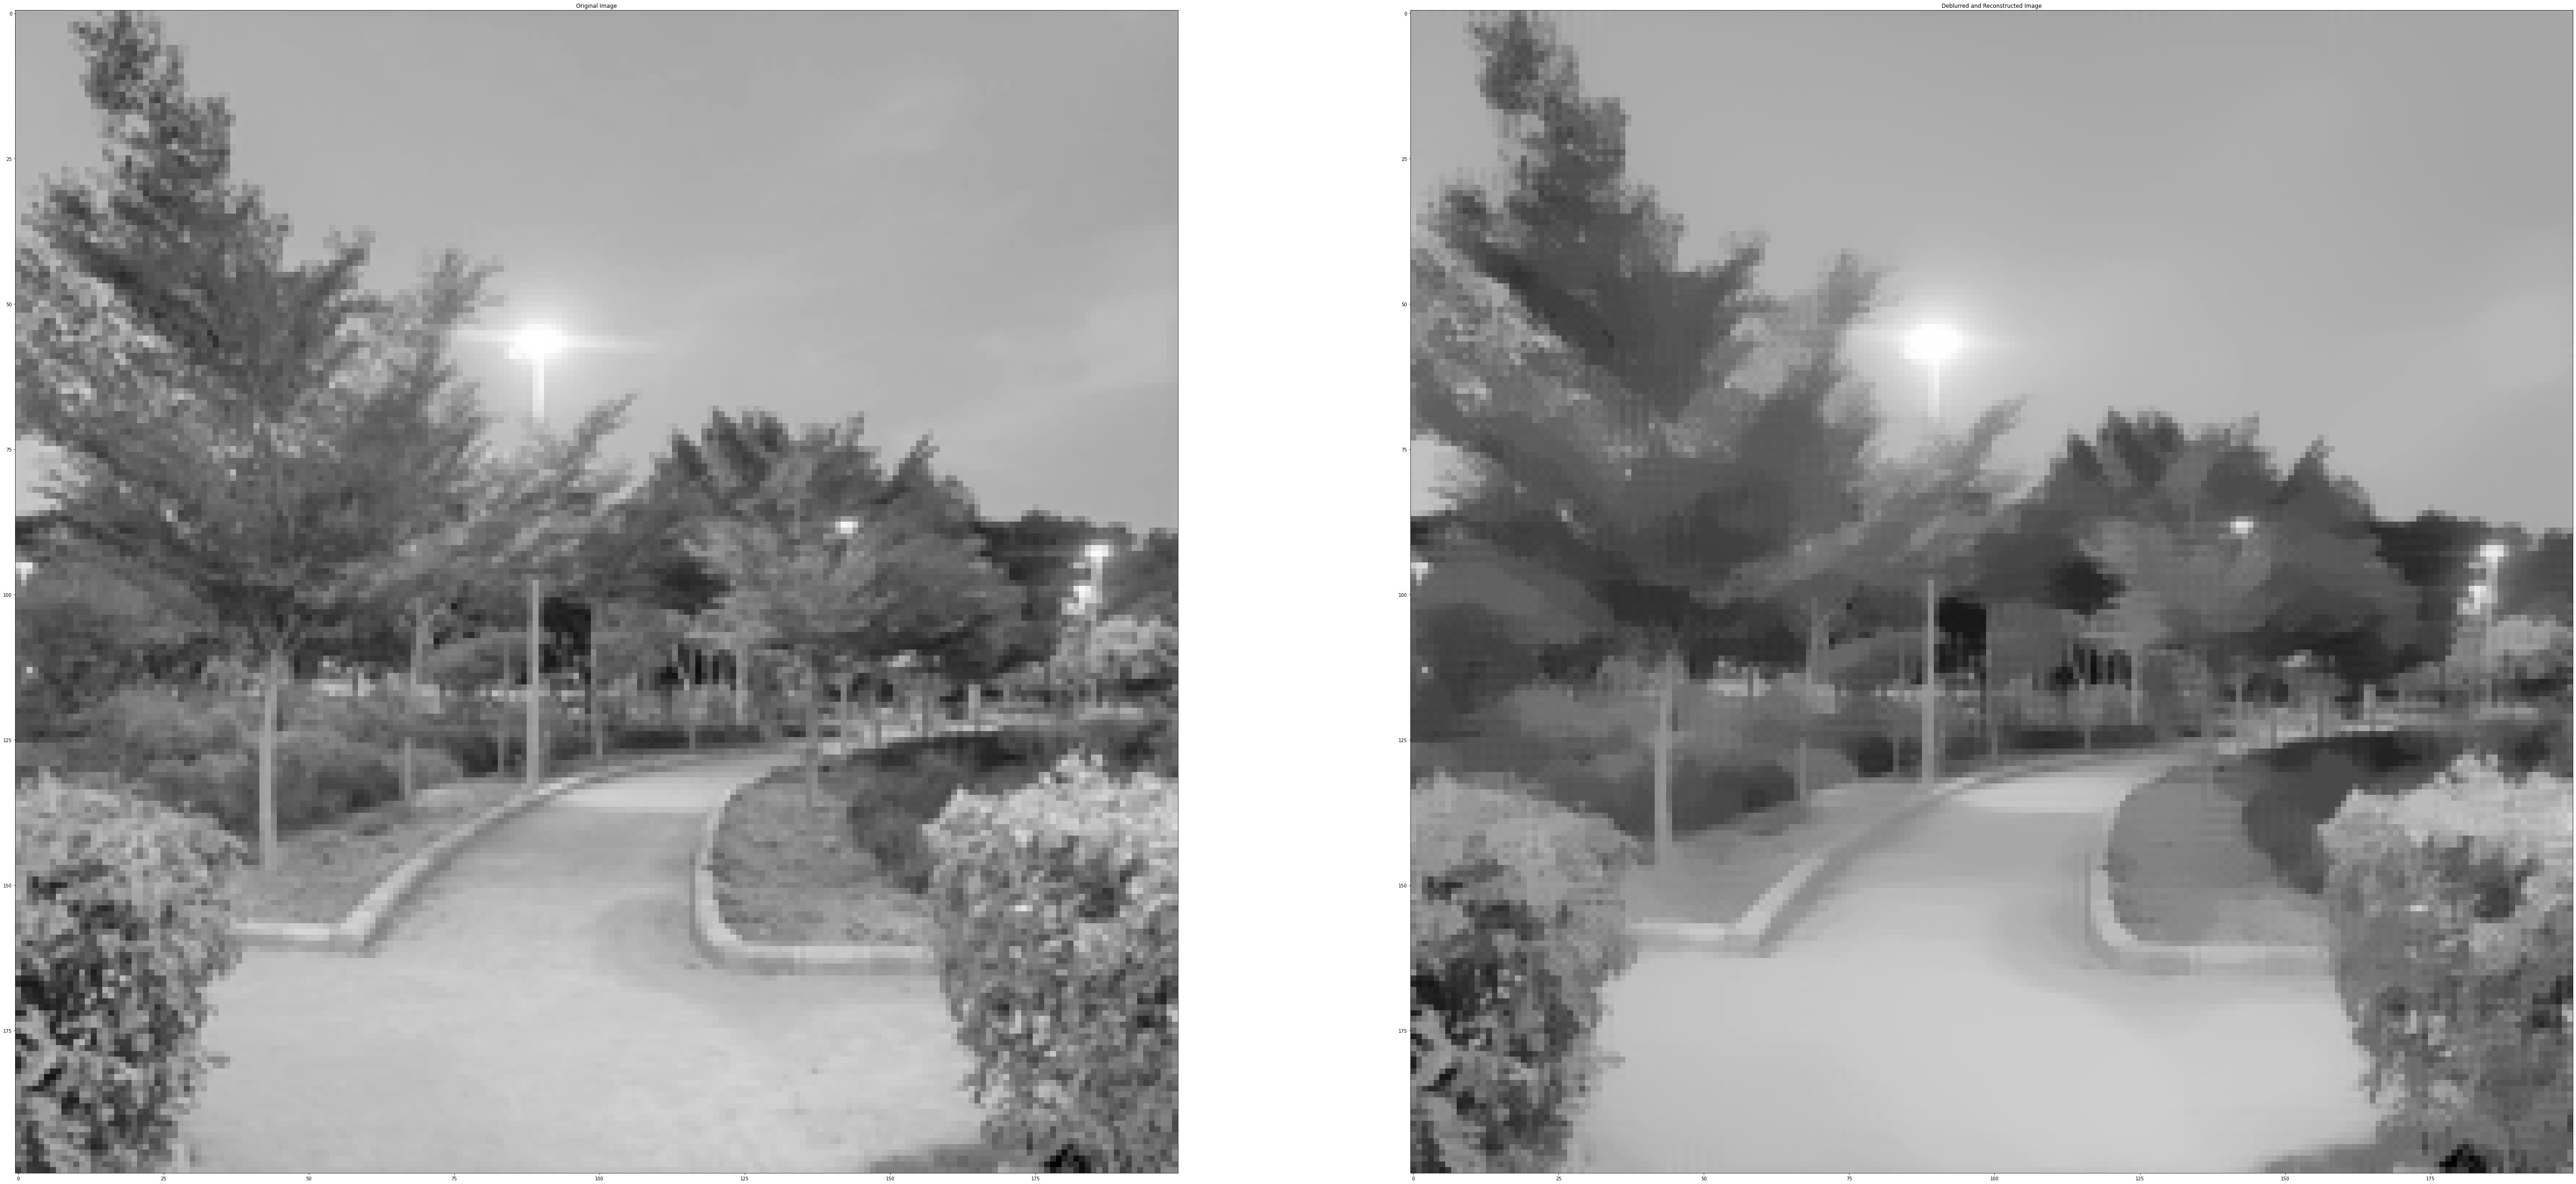

In [67]:
im, ax = plt.subplots(1, 2, figsize= (100,500))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(img_denoised, cmap='gray')
ax[1].set_title('Deblurred and Reconstructed Image')

In [15]:
def plot_images(img_path,alpha):
    Noisy = cv.imread(img_path, cv.IMREAD_UNCHANGED)
    Noisy = cv.cvtColor(Noisy, cv.COLOR_BGR2RGB)
    Y_Noisy, U_Noisy, V_Noisy = cv.split(cv.cvtColor(Noisy, cv.COLOR_RGB2YUV))
    y_denoised = TV_denoising(Y_Noisy, alpha, np.random.randint(0, 255, Y_Noisy.shape))
    y_denoised = y_denoised/np.max(y_denoised)
    y_denoised = np.uint8(y_denoised*255)
    denoised = cv.merge((y_denoised, U_Noisy, V_Noisy))
    denoised = cv.cvtColor(denoised, cv.COLOR_YUV2RGB)
    plt.rcParams['figure.figsize'] = [20, 10]
    f, axarr = plt.subplots(1, 2)
    f.suptitle(f'alpha = {alpha}', fontsize=20, y=0.85)
    axarr[0].imshow(Noisy)
    axarr[0].set_title('Original Noisy Image')
    axarr[1].imshow(denoised)
    axarr[1].set_title('Image After TV Denoising')

808 iterations


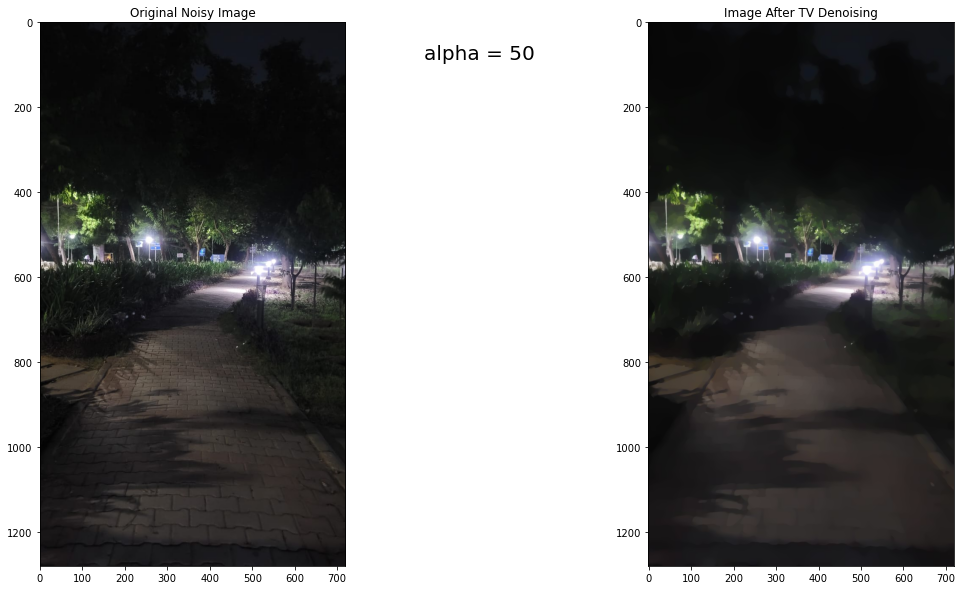

In [22]:
plot_images('./Assignment 2/13.jpeg', 50)

1016 iterations


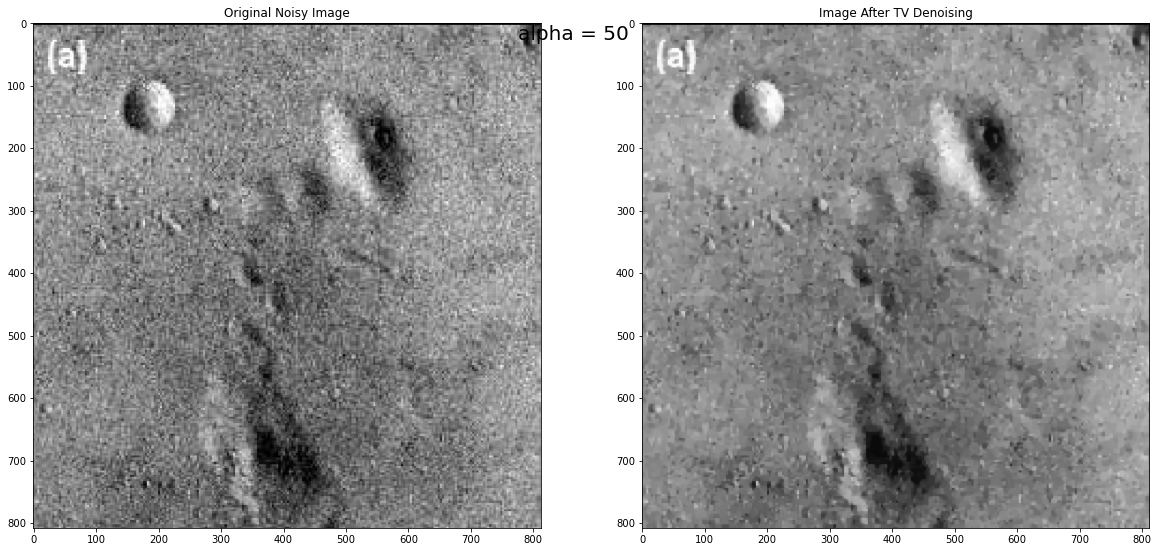

In [33]:
plot_images('./Assignment 2/3.jpg', 50)